In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\machinelearning\capstoneproject\YourCabs-Capstone.csv')
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,NaN,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [3]:
df1=data[data.travel_type_id==1]
df1.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [4]:
df1.shape

(1589, 19)

In [5]:
df1.shape[0]

1589

In [6]:
df1['travel_type_id'].unique()

array([1], dtype=int64)

In [7]:
df1['id'].value_counts().sum()
# All unique values here, so drop it. Also user_id reflects personal info hence drop it

1589

In [8]:
df1=df1.drop(['id','user_id'],axis=1)

In [9]:
df1.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [10]:
a=df1['vehicle_model_id'].mode()[0]
a
# Here, vehicle_model_id has the highest frequency

12

In [11]:
b=df1['vehicle_model_id'].value_counts()[a]
b
# 734 rows with 12 out of 1589

734

In [12]:
c=(b/df1.shape[0])*100
c
# Since, 12 appears here for 46% hence it will create bias so drop this column vehicle_model_id

46.19257394587791

In [13]:
df1['package_id'].value_counts(dropna=False)
# Drop this column also as it has all null values.

NaN    1589
Name: package_id, dtype: int64

In [14]:
df1=df1.drop(['vehicle_model_id','package_id'],axis=1)
df1.head()

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [15]:
df1['travel_type_id'].unique()
# All are 1 so drop

array([1], dtype=int64)

In [16]:
df1['to_area_id'].value_counts(dropna=False)
# All are Null, except 1080 which appears once out of 1589 rows, so drop

NaN       1588
1080.0       1
Name: to_area_id, dtype: int64

In [17]:
df1=df1.drop(['travel_type_id','to_area_id'],axis=1)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,1383.0,NaN,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,515.0,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,136.0,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,1118.0,NaN,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [18]:
df1['from_city_id'].isna().sum()
# 196 null values, so fill them up using mode, since it is a categorical column

196

In [19]:
mode_value=df1['from_city_id'].mode()[0]
mode_value

15.0

In [20]:
df1['from_city_id'].fillna(mode_value,inplace=True)

In [21]:
df1['from_city_id'].isna().sum()

0

In [22]:
df1['to_city_id'].isna().sum()

1

In [23]:
mode_value=df1['to_city_id'].mode()[0]
mode_value

32.0

In [24]:
df1['to_city_id'].fillna(mode_value,inplace=True)

In [25]:
df1['to_city_id'].isna().sum()

0

In [26]:
# to_lat, to_long
print(df1['to_lat'].isna().sum())
# Out of 1589 rows, 1588 are null. So drop
print(df1['to_long'].isna().sum())
# Out of 1589 rows, 1588 are null. So drop

1588
1588


In [27]:
df1=df1.drop(['to_lat','to_long'],axis=1)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,12.951850,77.696420,0
17,1383.0,15.0,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,12.930451,77.685822,0
24,515.0,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,12.978960,77.673450,0
158,136.0,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,12.907960,77.624180,0
216,1118.0,15.0,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,12.930220,77.560390,0


In [28]:
# Since 'to_lat','to_long' have been dropped hence there is no requirement of from_lat and from_long, so drop them also.
df1=df1.drop(['from_lat','from_long'],axis=1)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,41275.40625,0,0,01-01-2013 09:21,0
17,1383.0,15.0,32.0,01-12-2013 08:00,41288.00000,1,0,01-01-2013 12:17,0
24,515.0,15.0,32.0,01-05-2013 08:30,41279.00000,0,0,01-01-2013 14:40,0
158,136.0,1.0,152.0,01-04-2013 09:30,41278.39583,1,0,01-03-2013 12:19,0
216,1118.0,15.0,32.0,01-06-2013 07:30,41280.00000,1,0,01-04-2013 09:32,0


In [29]:
df1['to_date'].isna().sum()
# 85 null values, so fill up the mean value.

85

In [30]:
mean_value=df1['to_date'].mean()
mean_value

41364.5134281189

In [31]:
df1['to_date'].fillna(mean_value,inplace=True)

In [32]:
df1['to_date'].isna().sum()

0

In [33]:
df1['to_date']=pd.to_datetime(df1['to_date'])

In [34]:
df1['to_date'].head()
# We don't want this extra part 00:00:00.000041275

6     1970-01-01 00:00:00.000041275
17    1970-01-01 00:00:00.000041288
24    1970-01-01 00:00:00.000041279
158   1970-01-01 00:00:00.000041278
216   1970-01-01 00:00:00.000041280
Name: to_date, dtype: datetime64[ns]

In [35]:
df1['to_date']=df1['to_date'].dt.date
df1['to_date'].head()
# Its in object format so convert it back to datetime

6      1970-01-01
17     1970-01-01
24     1970-01-01
158    1970-01-01
216    1970-01-01
Name: to_date, dtype: object

In [36]:
df1['to_date']=pd.to_datetime(df1['to_date'])
df1['to_date'].head()

6     1970-01-01
17    1970-01-01
24    1970-01-01
158   1970-01-01
216   1970-01-01
Name: to_date, dtype: datetime64[ns]

In [37]:
df1['from_date']=pd.to_datetime(df1['from_date'])

In [38]:
df1['from_date'].head()

6     2013-01-01 09:45:00
17    2013-01-12 08:00:00
24    2013-01-05 08:30:00
158   2013-01-04 09:30:00
216   2013-01-06 07:30:00
Name: from_date, dtype: datetime64[ns]

In [39]:
print(df1['from_date'].min())
print(df1['from_date'].max())

2013-01-01 09:45:00
2014-01-06 05:00:00


In [40]:
print(df1['to_date'].min())
print(df1['to_date'].max())

1970-01-01 00:00:00
1970-01-01 00:00:00


In [41]:
# Now calculate the number of days spent in travel by using the formula: days_travelled = to_date - from_date
df1['days_travelled']=abs(df1['to_date']-df1['from_date']).dt.days

In [42]:
df1['days_travelled'].head(20)

6      15706
17     15717
24     15710
158    15709
216    15711
233    15710
234    15710
243    15714
328    15710
332    15711
374    15711
422    15724
485    15715
610    15714
668    15718
669    15717
704    15716
717    15744
738    15717
779    15717
Name: days_travelled, dtype: int64

In [43]:
# wE can drop the to_date and days_travelled columns because to_date refers to 1970s and days_travelled means days spent in
# travel between 1970s and 2013s, which here is meaningless. So drop these two columns.

In [44]:
df1=df1.drop(['to_date','days_travelled'],axis=1)

In [45]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,01-01-2013 09:21,0
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,01-01-2013 12:17,0
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,01-01-2013 14:40,0
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,01-03-2013 12:19,0
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,01-04-2013 09:32,0


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   float64       
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   object        
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 111.7+ KB


In [47]:
df1['booking_created']=pd.to_datetime(df1['booking_created'])

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   float64       
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 111.7 KB


In [49]:
df1['from_area_id'].isna().sum()
# 88 null values, so impute them by mode

88

In [50]:
mode_value=df1['from_area_id'].mode()[0]
mode_value

393.0

In [51]:
df1['from_area_id'].fillna(mode_value,inplace=True)

In [52]:
df1['from_area_id'].isna().sum()

0

In [53]:
df1['from_area_id']=df1['from_area_id'].astype('int')

In [54]:
df1['from_area_id']=df1['from_area_id'].astype('str')

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   object        
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 111.7+ KB


In [56]:
df1['route_from_area_id']=df1['from_area_id']+'-->'

In [57]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->


In [58]:
# Cancellation percentages
canc_route_from_area_mean=df1.groupby('route_from_area_id').mean()['Car_Cancellation']
canc_route_from_area_mean

route_from_area_id
1010-->    0.0
1012-->    0.0
1013-->    0.0
1017-->    0.0
1021-->    0.0
          ... 
949-->     0.0
953-->     0.0
974-->     0.0
977-->     0.0
988-->     0.0
Name: Car_Cancellation, Length: 297, dtype: float64

In [59]:
df1['canc_route_from_area_mean']=df1['route_from_area_id'].map(canc_route_from_area_mean)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,canc_route_from_area_mean
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,0.020408
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,0.000000
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,0.000000
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,0.000000
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,0.000000


In [60]:
df1['canc_route_from_area_perc']=df1['canc_route_from_area_mean']*100

In [61]:
df1.drop('canc_route_from_area_mean',axis=1,inplace=True)

In [62]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,canc_route_from_area_perc
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,2.040816
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,0.000000
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,0.000000
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,0.000000
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,0.000000


In [63]:
df1.describe()

,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,canc_route_from_area_perc
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,14.126495,68.514789,0.427313,0.018880,0.013216,1.321586
std,3.645118,49.873448,0.494844,0.136143,0.114234,4.423861
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,49.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,108.000000,1.000000,0.000000,0.000000,0.869565
max,31.000000,203.000000,1.000000,1.000000,1.000000,50.000000


In [64]:
# Now out of 1589 rows some 20 odd rows have 1 value only that is cancellations are very few here. 
# Min is 0% cancellations, 25% of the routes have 0% cancellations, 50% of the routes have 0% cancellations, 75% of the routes have
# 0.87% cancellations and max cancellation of a route/routes is 50%.

In [65]:
# Now, create tags
def percentage(x):
    if x==0:
        return 'Zero'
    elif x<=0.87:
        return 'Low'
    elif x<=25:
        return 'Medium'
    else:
        return 'High'

In [66]:
df1['Canc_Tags_from_area']=df1['canc_route_from_area_perc'].apply(percentage)

In [67]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,canc_route_from_area_perc,Canc_Tags_from_area
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,2.040816,Medium
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,0.000000,Zero
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,0.000000,Zero
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,0.000000,Zero
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,0.000000,Zero


In [68]:
df1.drop('canc_route_from_area_perc',axis=1,inplace=True)

In [69]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,Canc_Tags_from_area
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,Medium
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,Zero
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,Zero
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,Zero
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,Zero


In [70]:
# booking percentages per route
book_route_from_area_perc=(df1.groupby('route_from_area_id').count()['from_area_id']/df1.shape[0])*100
book_route_from_area_perc

route_from_area_id
1010-->    1.321586
1012-->    0.251731
1013-->    0.251731
1017-->    0.251731
1021-->    0.251731
             ...   
949-->     0.314663
953-->     0.062933
974-->     0.251731
977-->     0.377596
988-->     0.188798
Name: from_area_id, Length: 297, dtype: float64

In [71]:
df1['book_route_from_area_perc']=df1['route_from_area_id'].map(book_route_from_area_perc)

In [72]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,Canc_Tags_from_area,book_route_from_area_perc
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,Medium,6.167401
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,Zero,0.251731
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,Zero,0.503461
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,Zero,0.503461
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,Zero,0.062933


In [73]:
df1.describe()

,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,book_route_from_area_perc
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,14.126495,68.514789,0.427313,0.018880,0.013216,5.628255
std,3.645118,49.873448,0.494844,0.136143,0.114234,8.597704
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.062933
25%,15.000000,32.000000,0.000000,0.000000,0.000000,0.251731
50%,15.000000,49.000000,0.000000,0.000000,0.000000,0.692259
75%,15.000000,108.000000,1.000000,0.000000,0.000000,6.167401
max,31.000000,203.000000,1.000000,1.000000,1.000000,21.711768


In [74]:
def create_tags(x):
    if x<=0.251731:
        return 'Low'
    elif x<=6.167401:
        return 'Medium'
    else:
        return 'High'

In [75]:
df1['Booking_Tags_from_area']=df1['book_route_from_area_perc'].apply(create_tags)

In [76]:
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route_from_area_id,Canc_Tags_from_area,book_route_from_area_perc,Booking_Tags_from_area
6,571,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,571-->,Medium,6.167401,Medium
17,1383,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1383-->,Zero,0.251731,Low
24,515,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,515-->,Zero,0.503461,Medium
158,136,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,136-->,Zero,0.503461,Medium
216,1118,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1118-->,Zero,0.062933,Low


In [77]:
# Now, drop from_area_id, route_from_area_id, book_route_from_area_perc

In [78]:
df1.drop(['from_area_id', 'route_from_area_id', 'book_route_from_area_perc'],axis=1,inplace=True)

In [79]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium
17,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium
216,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   from_city_id            1589 non-null   float64       
 1   to_city_id              1589 non-null   float64       
 2   from_date               1589 non-null   datetime64[ns]
 3   online_booking          1589 non-null   int64         
 4   mobile_site_booking     1589 non-null   int64         
 5   booking_created         1589 non-null   datetime64[ns]
 6   Car_Cancellation        1589 non-null   int64         
 7   Canc_Tags_from_area     1589 non-null   object        
 8   Booking_Tags_from_area  1589 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 124.1+ KB


In [81]:
print(df1['from_city_id'].isna().sum())
print(df1['to_city_id'].isna().sum())

0
0


In [82]:
df1['from_city_id']=df1['from_city_id'].astype('int')
df1['to_city_id']=df1['to_city_id'].astype('int')

In [83]:
df1['from_city_id']=df1['from_city_id'].astype('str')
df1['to_city_id']=df1['to_city_id'].astype('str')

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   from_city_id            1589 non-null   object        
 1   to_city_id              1589 non-null   object        
 2   from_date               1589 non-null   datetime64[ns]
 3   online_booking          1589 non-null   int64         
 4   mobile_site_booking     1589 non-null   int64         
 5   booking_created         1589 non-null   datetime64[ns]
 6   Car_Cancellation        1589 non-null   int64         
 7   Canc_Tags_from_area     1589 non-null   object        
 8   Booking_Tags_from_area  1589 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 124.1+ KB


In [85]:
df1['route_from_to_city']=df1['from_city_id']+'-->'+df1['to_city_id']

In [86]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32


In [87]:
canc_route_fr_to_mean=df1.groupby('route_from_to_city').mean()['Car_Cancellation']

In [88]:
canc_route_fr_to_mean

route_from_to_city
1-->108     0.0
1-->113     0.0
1-->116     0.0
1-->12      0.0
1-->125     0.0
           ... 
15-->89     0.0
15-->97     0.0
31-->132    0.0
31-->29     0.0
31-->44     0.0
Name: Car_Cancellation, Length: 152, dtype: float64

In [89]:
df1['canc_route_fr_to_mean']=df1['route_from_to_city'].map(canc_route_fr_to_mean)

In [90]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_mean
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,0.016129
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32,0.017937
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32,0.017937
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152,0.000000
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32,0.017937


In [91]:
df1['canc_route_fr_to_perc']=df1['canc_route_fr_to_mean']*100

In [92]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_mean,canc_route_fr_to_perc
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,0.016129,1.612903
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32,0.017937,1.793722
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32,0.017937,1.793722
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152,0.000000,0.000000
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32,0.017937,1.793722


In [93]:
df1.drop('canc_route_fr_to_mean',axis=1,inplace=True)

In [94]:
df1.head(1)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_perc
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,1.612903


In [95]:
df1.describe()

,online_booking,mobile_site_booking,Car_Cancellation,canc_route_fr_to_perc
count,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.427313,0.018880,0.013216,1.321586
std,0.494844,0.136143,0.114234,1.912082
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.793722
max,1.000000,1.000000,1.000000,8.695652


In [96]:
def percent1(x):
    if x==0:
        return 'Zero'
    elif x<=1.793722:
        return 'Low'
    elif x<=4:
        return 'Medium'
    else:
        return 'High'

In [97]:
df1['canc_Tags_fr_to_perc']=df1['canc_route_fr_to_perc'].apply(percent1)

In [98]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_perc,canc_Tags_fr_to_perc
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,1.612903,Low
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32,1.793722,Low
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32,1.793722,Low
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152,0.000000,Zero
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32,1.793722,Low


In [99]:
# Now, create the booking tags.
booking_route_fr_to_perc=(df1.groupby('route_from_to_city').count()['from_city_id']/df1.shape[0])*100

In [100]:
booking_route_fr_to_perc

route_from_to_city
1-->108     0.125865
1-->113     0.062933
1-->116     0.062933
1-->12      0.062933
1-->125     0.062933
              ...   
15-->89     0.503461
15-->97     0.062933
31-->132    0.125865
31-->29     0.125865
31-->44     0.125865
Name: from_city_id, Length: 152, dtype: float64

In [101]:
df1['booking_route_fr_to_perc']=df1['route_from_to_city'].map(booking_route_fr_to_perc)
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_perc,canc_Tags_fr_to_perc,booking_route_fr_to_perc
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,1.612903,Low,3.901825
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32,1.793722,Low,28.067967
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32,1.793722,Low,28.067967
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152,0.000000,Zero,0.251731
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32,1.793722,Low,28.067967


In [102]:
df1.describe()

,online_booking,mobile_site_booking,Car_Cancellation,canc_route_fr_to_perc,booking_route_fr_to_perc
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.427313,0.018880,0.013216,1.321586,10.208359
std,0.494844,0.136143,0.114234,1.912082,11.566780
min,0.000000,0.000000,0.000000,0.000000,0.062933
25%,0.000000,0.000000,0.000000,0.000000,0.755192
50%,0.000000,0.000000,0.000000,0.000000,5.223411
75%,1.000000,0.000000,0.000000,1.793722,28.067967
max,1.000000,1.000000,1.000000,8.695652,28.067967


In [103]:
def tags1(x):
    if x<=0.755192:
        return 'Low'
    elif x<=5.223411:
        return 'Medium'
    else:
        return 'High'

In [104]:
df1['booking_Tags_fr_to_city']=df1['booking_route_fr_to_perc'].apply(tags1)

In [105]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,route_from_to_city,canc_route_fr_to_perc,canc_Tags_fr_to_perc,booking_route_fr_to_perc,booking_Tags_fr_to_city
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,15-->108,1.612903,Low,3.901825,Medium
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,15-->32,1.793722,Low,28.067967,High
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,15-->32,1.793722,Low,28.067967,High
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,1-->152,0.000000,Zero,0.251731,Low
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,15-->32,1.793722,Low,28.067967,High


In [106]:
df1.drop(['route_from_to_city','canc_route_fr_to_perc','booking_route_fr_to_perc'],axis=1,inplace=True)

In [107]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Medium,Low,Medium
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Low,Low,High
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,Low,High
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Medium,Zero,Low
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Low,Low,High


In [108]:
print(df1['Canc_Tags_from_area'].unique())
print(df1['Booking_Tags_from_area'].unique())
print(df1['canc_Tags_fr_to_perc'].unique())
print(df1['booking_Tags_fr_to_city'].unique())

['Medium' 'Zero' 'Low' 'High']
['Medium' 'Low' 'High']
['Low' 'Zero' 'Medium' 'High']
['Medium' 'High' 'Low']


In [109]:
# Canc_Tags_from_area	Booking_Tags_from_area	canc_Tags_fr_to_perc	booking_Tags_fr_to_city
df1['Canc_Tags_from_area']=df1['Canc_Tags_from_area'].map({'Zero':0,'Low':1,'Medium':2,'High':3})
df1['Booking_Tags_from_area']=df1['Booking_Tags_from_area'].map({'Low':1,'Medium':2,'High':3})
df1['canc_Tags_fr_to_perc']=df1['canc_Tags_fr_to_perc'].map({'Zero':0,'Low':1,'Medium':2,'High':3})
df1['booking_Tags_fr_to_city']=df1['booking_Tags_fr_to_city'].map({'Low':1,'Medium':2,'High':3})

In [110]:
df1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3


In [111]:
df1.drop(['from_city_id','to_city_id'],axis=1,inplace=True)

In [112]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3


In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   from_date                1589 non-null   datetime64[ns]
 1   online_booking           1589 non-null   int64         
 2   mobile_site_booking      1589 non-null   int64         
 3   booking_created          1589 non-null   datetime64[ns]
 4   Car_Cancellation         1589 non-null   int64         
 5   Canc_Tags_from_area      1589 non-null   int64         
 6   Booking_Tags_from_area   1589 non-null   int64         
 7   canc_Tags_fr_to_perc     1589 non-null   int64         
 8   booking_Tags_fr_to_city  1589 non-null   int64         
dtypes: datetime64[ns](2), int64(7)
memory usage: 124.1 KB


In [114]:
df1['DayofWeek']=df1['from_date'].dt.day_name()

In [115]:
df1['Month']=df1['from_date'].dt.month

In [116]:
df1['Weekday/Weekend']=df1['from_date'].dt.dayofweek//5

In [117]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,DayofWeek,Month,Weekday/Weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,Tuesday,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,Saturday,1,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,Saturday,1,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,Friday,1,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,Sunday,1,1


In [118]:
def transform(hour):
    if hour>=6 and hour<12:
        return 'Morning'
    elif hour>=12 and hour<18:
        return 'Afternoon'
    elif hour>=18 and hour<24:
        return 'Evening'
    else:
        return 'Night'

In [119]:
df1['TimeofDay']=df1['from_date'].dt.hour.apply(transform)

In [120]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,DayofWeek,Month,Weekday/Weekend,TimeofDay
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,Tuesday,1,0,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,Saturday,1,1,Morning
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,Saturday,1,1,Morning
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,Friday,1,0,Morning
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,Sunday,1,1,Morning


In [121]:
df1['Book_DayofWeek']=df1['booking_created'].dt.day_name()

In [122]:
df1['Book_Month']=df1['booking_created'].dt.month

In [123]:
df1['Book_Weekday/Weekend']=df1['booking_created'].dt.dayofweek//5

In [124]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,DayofWeek,Month,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Weekday/Weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,Tuesday,1,0,Morning,Tuesday,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,Saturday,1,1,Morning,Tuesday,1,0
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,Saturday,1,1,Morning,Tuesday,1,0
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,Friday,1,0,Morning,Thursday,1,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,Sunday,1,1,Morning,Friday,1,0


In [125]:
def transform1(hour):
    if hour>=6 and hour<12:
        return 'Morning'
    elif hour>=12 and hour<18:
        return 'Afternoon'
    elif hour>=18 and hour<24:
        return 'Evening'
    else:
        return 'Night'

In [126]:
df1['Book_TimeofDay']=df1['booking_created'].dt.hour.apply(transform1)

In [127]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,DayofWeek,Month,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Weekday/Weekend,Book_TimeofDay
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,Tuesday,1,0,Morning,Tuesday,1,0,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,Saturday,1,1,Morning,Tuesday,1,0,Afternoon
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,Saturday,1,1,Morning,Tuesday,1,0,Afternoon
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,Friday,1,0,Morning,Thursday,1,0,Afternoon
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,Sunday,1,1,Morning,Friday,1,0,Morning


In [128]:
df1['Time_gap_hours']=(df1['from_date']-df1['booking_created']).dt.total_seconds()/3600

In [129]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,DayofWeek,Month,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Weekday/Weekend,Book_TimeofDay,Time_gap_hours
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,Tuesday,1,0,Morning,Tuesday,1,0,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,Saturday,1,1,Morning,Tuesday,1,0,Afternoon,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,Saturday,1,1,Morning,Tuesday,1,0,Afternoon,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,Friday,1,0,Morning,Thursday,1,0,Afternoon,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,Sunday,1,1,Morning,Friday,1,0,Morning,45.966667


In [130]:
df1['DayofWeek'].unique()

array(['Tuesday', 'Saturday', 'Friday', 'Sunday', 'Wednesday', 'Thursday',
       'Monday'], dtype=object)

In [131]:
df1['TimeofDay'].unique()

array(['Morning', 'Evening', 'Afternoon', 'Night'], dtype=object)

In [132]:
# Since these types of categorical variables represent that they are nominal and not ordinal, hence better to apply one hot encoding only.

In [133]:
DayofWeek_Encoded=pd.get_dummies(df1['DayofWeek'],prefix='day')
df1=pd.concat((df1,DayofWeek_Encoded),axis=1)
df1.drop('DayofWeek',axis=1,inplace=True)

In [134]:
TimeofDay_Encoded=pd.get_dummies(df1['TimeofDay'],prefix='time')
df1=pd.concat((df1,TimeofDay_Encoded),axis=1)
df1.drop('TimeofDay',axis=1,inplace=True)

In [135]:
Book_DayofWeek_Encoded=pd.get_dummies(df1['Book_DayofWeek'],prefix='bookday')
df1=pd.concat((df1,Book_DayofWeek_Encoded),axis=1)
df1.drop('Book_DayofWeek',axis=1,inplace=True)

In [136]:
Book_TimeofDay_Encoded=pd.get_dummies(df1['Book_TimeofDay'],prefix='booktime')
df1=pd.concat((df1,Book_TimeofDay_Encoded),axis=1)
df1.drop('Book_TimeofDay',axis=1,inplace=True)

In [137]:
df1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,Month,...,bookday_Monday,bookday_Saturday,bookday_Sunday,bookday_Thursday,bookday_Tuesday,bookday_Wednesday,booktime_Afternoon,booktime_Evening,booktime_Morning,booktime_Night
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,2,2,1,2,1,...,0,0,0,0,1,0,0,0,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,3,1,...,0,0,0,0,1,0,1,0,0,0
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,2,1,3,1,...,0,0,0,0,1,0,1,0,0,0
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,2,0,1,1,...,0,0,0,1,0,0,1,0,0,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,3,1,...,0,0,0,0,0,0,0,0,1,0


In [138]:
df1=df1.drop(['from_date','booking_created'],axis=1)

In [139]:
#X=df1.drop('Car_Cancellation',axis=1)
#Y=df1['Car_Cancellation']

In [140]:
#X.shape

In [141]:
#Y.shape

In [142]:
#Y.value_counts()

In [143]:
# There is data imbalancing here, so need to apply OverSampling

In [144]:
#from imblearn.over_sampling import SMOTE

In [145]:
#smote=SMOTE()

In [146]:
#X_resampled,Y_resampled=smote.fit_resample(X,Y)

In [147]:
#X_resampled.head()

In [148]:
##Y_resampled.head()

In [149]:
#Y_resampled.value_counts()

In [150]:
#df1_new=pd.concat((X_resampled,Y_resampled),axis=1)

In [151]:
#df1_new.head()

In [152]:
#df1_new['Car_Cancellation'].value_counts()

In [153]:
df1_new=df1
df1_new.shape

(1589, 34)

In [154]:
df1_new.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Canc_Tags_from_area', 'Booking_Tags_from_area', 'canc_Tags_fr_to_perc',
       'booking_Tags_fr_to_city', 'Month', 'Weekday/Weekend', 'Book_Month',
       'Book_Weekday/Weekend', 'Time_gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Morning',
       'time_Night', 'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night'],
      dtype='object')

In [155]:
data_subset=df1_new[['day_Friday','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday',
                    'bookday_Friday','bookday_Monday','bookday_Saturday','bookday_Sunday','bookday_Thursday','bookday_Tuesday',
                    'bookday_Wednesday','Car_Cancellation']]

In [156]:
corr_matrix=data_subset.corr()

In [157]:
corr_matrix

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,bookday_Friday,bookday_Monday,bookday_Saturday,bookday_Sunday,bookday_Thursday,bookday_Tuesday,bookday_Wednesday,Car_Cancellation
day_Friday,1.000000,-0.137633,-0.276841,-0.220694,-0.141722,-0.119273,-0.129212,0.016388,-0.077747,-0.171008,-0.120172,0.325394,-0.044077,0.067844,-0.004408
day_Monday,-0.137633,1.000000,-0.205050,-0.163463,-0.104971,-0.088343,-0.095705,-0.139763,0.077516,-0.056780,0.409984,-0.077089,-0.051932,-0.094372,0.096187
day_Saturday,-0.276841,-0.205050,1.000000,-0.328796,-0.211142,-0.177696,-0.192504,0.432490,-0.134651,-0.043364,-0.171052,0.007678,-0.145645,-0.065824,-0.037962
day_Sunday,-0.220694,-0.163463,-0.328796,1.000000,-0.168320,-0.141658,-0.153462,-0.137859,-0.123442,0.481771,0.157573,-0.133279,-0.157880,-0.150032,0.049434
day_Thursday,-0.141722,-0.104971,-0.211142,-0.168320,1.000000,-0.090968,-0.098548,-0.129792,0.021998,-0.139044,-0.103321,0.025615,0.057289,0.334663,-0.038048
day_Tuesday,-0.119273,-0.088343,-0.177696,-0.141658,-0.090968,1.000000,-0.082938,-0.114207,0.384354,-0.104079,-0.059456,-0.093929,0.156990,-0.091825,-0.032021
day_Wednesday,-0.129212,-0.095705,-0.192504,-0.153462,-0.098548,-0.082938,1.000000,-0.139343,0.042863,-0.105768,-0.055679,-0.104847,0.378095,0.064633,-0.034689
bookday_Friday,0.016388,-0.139763,0.432490,-0.137859,-0.129792,-0.114207,-0.139343,1.000000,-0.181436,-0.254327,-0.184966,-0.215870,-0.185550,-0.187298,-0.019911
bookday_Monday,-0.077747,0.077516,-0.134651,-0.123442,0.021998,0.384354,0.042863,-0.181436,1.000000,-0.170148,-0.123744,-0.144420,-0.124136,-0.125305,-0.004845
bookday_Saturday,-0.171008,-0.056780,-0.043364,0.481771,-0.139044,-0.104079,-0.105768,-0.254327,-0.170148,1.000000,-0.173458,-0.202440,-0.174006,-0.175645,0.027335


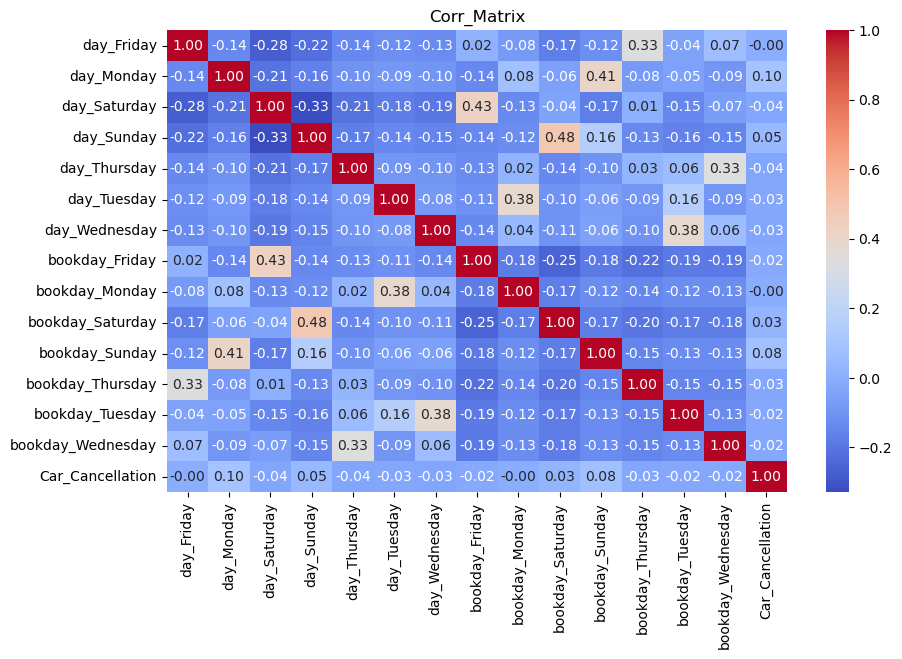

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Corr_Matrix')
plt.show()

In [159]:
df1_new.shape

(1589, 34)

In [160]:
data_subset1=df1_new[['Month','Weekday/Weekend','Book_Month','Book_Weekday/Weekend','Car_Cancellation']]

In [161]:
corr_matrix1=data_subset1.corr()

In [162]:
corr_matrix1

,Month,Weekday/Weekend,Book_Month,Book_Weekday/Weekend,Car_Cancellation
Month,1.000000,-0.019113,0.991886,-0.005753,0.098343
Weekday/Weekend,-0.019113,1.000000,-0.017883,0.282101,0.005584
Book_Month,0.991886,-0.017883,1.000000,-0.002130,0.095794
Book_Weekday/Weekend,-0.005753,0.282101,-0.002130,1.000000,0.079070
Car_Cancellation,0.098343,0.005584,0.095794,0.079070,1.000000


In [163]:
# Drop Book_Month only
df1_new=df1_new.drop('Book_Month',axis=1)

In [164]:
df1_new.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Canc_Tags_from_area', 'Booking_Tags_from_area', 'canc_Tags_fr_to_perc',
       'booking_Tags_fr_to_city', 'Month', 'Weekday/Weekend',
       'Book_Weekday/Weekend', 'Time_gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Morning',
       'time_Night', 'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night'],
      dtype='object')

In [165]:
data_subset2=df1_new[['time_Afternoon','time_Evening','time_Morning','time_Night','booktime_Afternoon','booktime_Evening','booktime_Morning','booktime_Night','Car_Cancellation']]

In [166]:
corr_matrix2=data_subset2.corr()

In [167]:
corr_matrix2

,time_Afternoon,time_Evening,time_Morning,time_Night,booktime_Afternoon,booktime_Evening,booktime_Morning,booktime_Night,Car_Cancellation
time_Afternoon,1.000000,-0.098353,-0.438864,-0.157994,0.049062,-0.101421,0.086479,-0.039439,-0.020038
time_Evening,-0.098353,1.000000,-0.390932,-0.140738,0.089687,-0.025593,-0.051948,-0.045379,0.006244
time_Morning,-0.438864,-0.390932,1.000000,-0.627990,-0.047668,0.034066,0.018481,-0.002117,-0.015436
time_Night,-0.157994,-0.140738,-0.627990,1.000000,-0.041642,0.053945,-0.053210,0.064906,0.030236
booktime_Afternoon,0.049062,0.089687,-0.047668,-0.041642,1.000000,-0.594413,-0.387836,-0.199049,-0.068687
booktime_Evening,-0.101421,-0.025593,0.034066,0.053945,-0.594413,1.000000,-0.369989,-0.189890,0.050469
booktime_Morning,0.086479,-0.051948,0.018481,-0.053210,-0.387836,-0.369989,1.000000,-0.123897,-0.015089
booktime_Night,-0.039439,-0.045379,-0.002117,0.064906,-0.199049,-0.189890,-0.123897,1.000000,0.063792
Car_Cancellation,-0.020038,0.006244,-0.015436,0.030236,-0.068687,0.050469,-0.015089,0.063792,1.000000


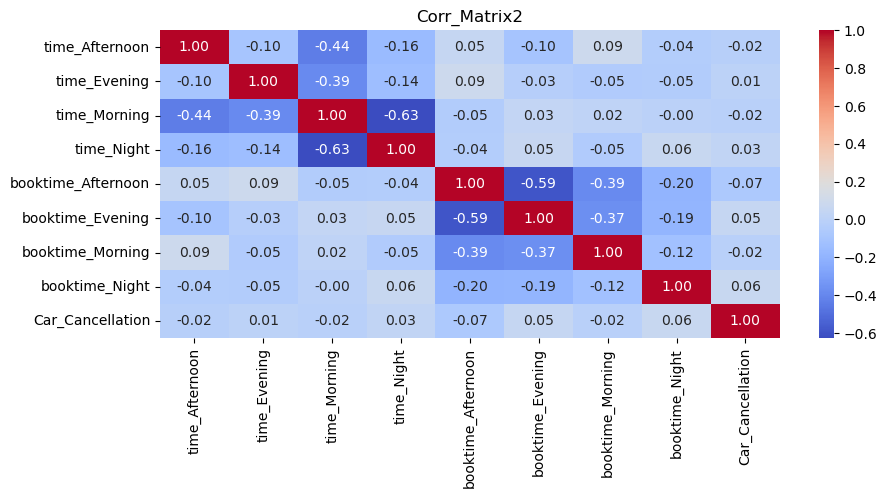

In [168]:
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Corr_Matrix2')
plt.show()

In [169]:
# Can drop time_Evening due to its low correlation with the target variable.
# Between time_Morning and time_Night, can drop time_Morning due to comparitively lower correlation with the target.
# Between booktime_Afternoon and booktime_Evening, drop booktime_Evening due to its comparitively lower correlation with the target.
# Remove booktime_Night.

In [170]:
df1_new=df1_new.drop(['time_Morning','booktime_Afternoon'],axis=1)

In [171]:
df1_new.shape

(1589, 31)

In [172]:
df1_new.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Canc_Tags_from_area', 'Booking_Tags_from_area', 'canc_Tags_fr_to_perc',
       'booking_Tags_fr_to_city', 'Month', 'Weekday/Weekend',
       'Book_Weekday/Weekend', 'Time_gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Evening', 'booktime_Morning',
       'booktime_Night'],
      dtype='object')

In [173]:
data_subset3=df1_new[['Canc_Tags_from_area','Booking_Tags_from_area','canc_Tags_fr_to_perc','booking_Tags_fr_to_city','Car_Cancellation']]

In [174]:
corr_matrix3=data_subset3.corr()

In [175]:
corr_matrix3

,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,Car_Cancellation
Canc_Tags_from_area,1.000000,0.419126,0.050292,0.090044,0.222245
Booking_Tags_from_area,0.419126,1.000000,0.032515,0.067204,-0.000598
canc_Tags_fr_to_perc,0.050292,0.032515,1.000000,0.308170,0.161335
booking_Tags_fr_to_city,0.090044,0.067204,0.308170,1.000000,0.032357
Car_Cancellation,0.222245,-0.000598,0.161335,0.032357,1.000000


In [176]:
df1_new.shape

(1589, 31)

In [177]:
df1_new.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Canc_Tags_from_area', 'Booking_Tags_from_area', 'canc_Tags_fr_to_perc',
       'booking_Tags_fr_to_city', 'Month', 'Weekday/Weekend',
       'Book_Weekday/Weekend', 'Time_gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Evening', 'booktime_Morning',
       'booktime_Night'],
      dtype='object')

In [178]:
data_subset4=df1_new[['online_booking', 'mobile_site_booking','Car_Cancellation']]

In [179]:
corr_matrix4=data_subset4.corr()
corr_matrix4

,online_booking,mobile_site_booking,Car_Cancellation
online_booking,1.000000,-0.119826,0.122835
mobile_site_booking,-0.119826,1.000000,-0.016054
Car_Cancellation,0.122835,-0.016054,1.000000


In [180]:
df1_new.shape

(1589, 31)

In [181]:
df1_new.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Canc_Tags_from_area', 'Booking_Tags_from_area', 'canc_Tags_fr_to_perc',
       'booking_Tags_fr_to_city', 'Month', 'Weekday/Weekend',
       'Book_Weekday/Weekend', 'Time_gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Evening', 'booktime_Morning',
       'booktime_Night'],
      dtype='object')

In [182]:
print(df1_new['Time_gap_hours'].min())
print(df1_new['Time_gap_hours'].max())

-7.7
1477.1833333333334


In [183]:
df1_new['Time_gap_hours']=df1_new['Time_gap_hours'].abs()

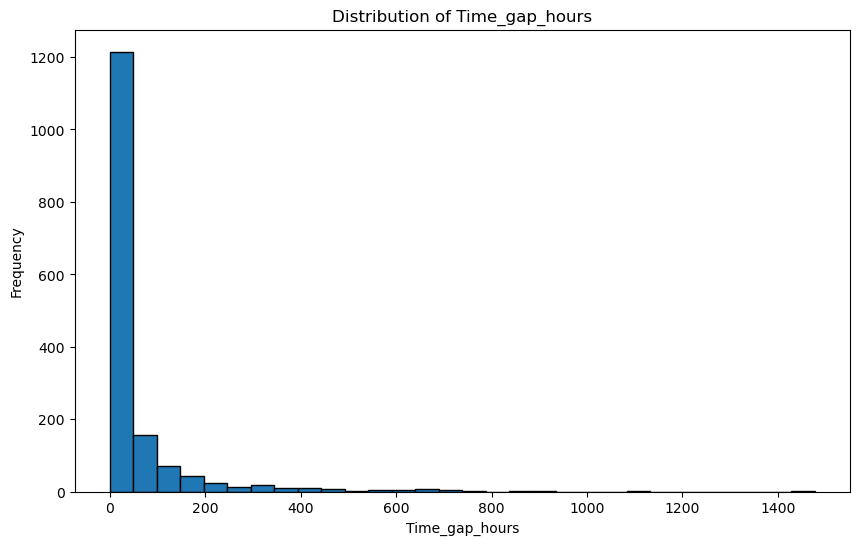

In [184]:
plt.figure(figsize=(10,6))
plt.hist(df1_new['Time_gap_hours'],bins=30,edgecolor='black')
plt.xlabel('Time_gap_hours')
plt.ylabel('Frequency')
plt.title('Distribution of Time_gap_hours')
plt.show()

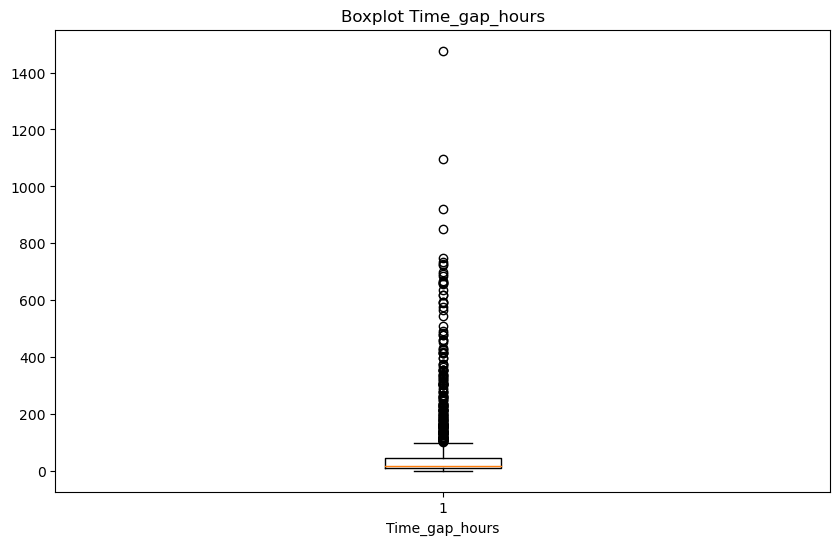

In [185]:
plt.figure(figsize=(10,6))
plt.boxplot(df1_new['Time_gap_hours'])
plt.xlabel('Time_gap_hours')
plt.title('Boxplot Time_gap_hours')
plt.show()

In [186]:
#Q1=df1_new['Time_gap_hours'].quantile(0.25)
#Q3=df1_new['Time_gap_hours'].quantile(0.75)
#IQR=Q3-Q1
#LL=Q1-1.5*IQR
#LL=max(0,LL) # Because Time cannot be negative
#UL=Q3+1.5*IQR
#Outliers=df1_new[(df1_new['Time_gap_hours']<LL)|(df1_new['Time_gap_hours']>UL)]
#print("Q1:",Q1)
#print("Q3:",Q3)
#print("IQR:",IQR)
#print("LL:",LL)
#print("UL:",UL)
#print("Number of Outliers are:",len(Outliers))
#print("Outliers are:",Outliers)

In [187]:
# Cap the outliers
#df1_new['Time_gap_hours']=df1_new['Time_gap_hours'].apply(lambda x:LL if x<LL else(UL if x>UL else x))

In [188]:
#Outliers=df1_new[(df1_new['Time_gap_hours']<LL)|(df1_new['Time_gap_hours']>UL)]
#print("Number of Outliers:",len(Outliers))

In [189]:
#df1_new['Time_gap_hours'].describe()

In [190]:
df1_new.shape

(1589, 31)

In [191]:
df1_new.isna().sum().sum()

0

In [192]:
#plt.figure(figsize=(10,6))
#plt.boxplot(df1_new['Time_gap_hours'])
#plt.xlabel('Time_gap_hours')
#plt.title('Boxplot Time_gap_hours')
#plt.show()

In [193]:
# Since all the features except Time_gap_hours are already encoded, hence no need to scale them. Only need to scale Time_gap_hours
# using StandardScaler or MinMaxScaler.

In [194]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [195]:
X=df1_new.drop('Car_Cancellation',axis=1)
Y=df1_new['Car_Cancellation']

In [196]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=111)

In [197]:
continous_feature=['Time_gap_hours']

In [198]:
mms=RobustScaler()

In [199]:
X_train[continous_feature]=mms.fit_transform(X_train[continous_feature])

In [200]:
X_test[continous_feature]=mms.transform(X_test[continous_feature])

In [201]:
X_train

,online_booking,mobile_site_booking,Canc_Tags_from_area,Booking_Tags_from_area,canc_Tags_fr_to_perc,booking_Tags_fr_to_city,Month,Weekday/Weekend,Book_Weekday/Weekend,Time_gap_hours,...,bookday_Friday,bookday_Monday,bookday_Saturday,bookday_Sunday,bookday_Thursday,bookday_Tuesday,bookday_Wednesday,booktime_Evening,booktime_Morning,booktime_Night
6477,1,0,0,2,0,1,4,0,0,16.775515,...,1,0,0,0,0,0,0,0,0,0
8915,1,0,1,3,2,3,4,0,0,-0.395074,...,0,0,0,0,1,0,0,0,1,0
35450,0,0,1,3,0,1,9,1,1,-0.193635,...,0,0,1,0,0,0,0,1,0,0
6762,1,0,1,3,0,1,3,0,0,11.601024,...,0,1,0,0,0,0,0,0,0,0
10317,0,0,1,3,1,2,4,1,0,0.744299,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,1,0,1,3,1,3,5,0,0,-0.406780,...,0,1,0,0,0,0,0,1,0,0
42846,1,0,1,3,2,3,11,0,0,-0.402878,...,0,0,0,0,0,1,0,0,0,0
4527,0,0,0,1,1,2,2,0,1,0.870626,...,0,0,1,0,0,0,0,0,1,0
37840,1,0,0,1,0,2,10,0,0,0.079015,...,0,1,0,0,0,0,0,0,1,0


In [202]:
# Here, fitted the scaler on the training data, and used the same scaler for tranforming both the training data and the test
# data, to ensure that the test data is unseen during the scaling process, will prevent data leakage.

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score,average_precision_score

In [213]:
from imblearn.over_sampling import SMOTE

In [214]:
smote=SMOTE(random_state=111)

In [215]:
X_resampled,Y_resampled=smote.fit_resample(X_train,Y_train)

In [1]:
from sklearn.linear_model import LogisticRegression

In [217]:
model_log_reg=LogisticRegression()

In [218]:
model_log_reg.fit(X_resampled,Y_resampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
Y_pred=model_log_reg.predict(X_test)

In [220]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       236
           1       0.38      1.00      0.55         3

    accuracy                           0.98       239
   macro avg       0.69      0.99      0.77       239
weighted avg       0.99      0.98      0.98       239



In [221]:
Y_pred_prob=model_log_reg.predict_proba(X_test)[:,1]

In [222]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.7666666666666666


Low Precision but Higher Average Precision: The low precision for Class 1 (0.27) indicates that when the model predicts a positive class, it is often incorrect. However, the higher average precision (0.79) suggests that across various thresholds, the model is better at distinguishing between the classes. The AP score is higher because it considers how the precision changes with recall, and it reflects the model's ability to rank positive instances higher than negative ones.

Class Imbalance Impact: In highly imbalanced datasets, precision alone can be misleading because the model may rarely predict the minority class (Class 1). The AP score, however, provides a more nuanced view by evaluating the model's performance over different thresholds.

In [223]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9790794979079498


In [224]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9901129943502824


In [225]:
from sklearn.svm import SVC

In [226]:
model_svc=SVC(kernel='rbf',C=1.0,gamma='scale',probability=True,random_state=111)

In [227]:
model_svc.fit(X_resampled,Y_resampled)

SVC(probability=True, random_state=111)

In [228]:
Y_pred=model_svc.predict(X_test)

In [229]:
Y_pred_proba=model_svc.predict_proba(X_test)[:,1]

In [230]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       236
           1       0.22      0.67      0.33         3

    accuracy                           0.97       239
   macro avg       0.61      0.82      0.66       239
weighted avg       0.99      0.97      0.97       239



In [231]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.7083333333333333


In [232]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9665271966527197


In [233]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9703389830508474


In [234]:
from sklearn.naive_bayes import GaussianNB

In [235]:
model_gnb=GaussianNB()

In [236]:
model_gnb.fit(X_resampled,Y_resampled)

GaussianNB()

In [237]:
Y_pred=model_gnb.predict(X_test)

In [238]:
Y_pred_proba=model_gnb.predict_proba(X_test)[:,1]

In [239]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       236
           1       0.04      0.67      0.08         3

    accuracy                           0.80       239
   macro avg       0.52      0.73      0.48       239
weighted avg       0.98      0.80      0.88       239



In [240]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.05531400966183574


In [241]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.799163179916318


In [242]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8347457627118644


In [243]:
model_res=RandomForestClassifier()

In [244]:
model_res.fit(X_resampled,Y_resampled)

RandomForestClassifier()

In [245]:
Y_pred=model_res.predict(X_test)

In [246]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      0.67      0.80         3

    accuracy                           1.00       239
   macro avg       1.00      0.83      0.90       239
weighted avg       1.00      1.00      1.00       239



In [247]:
Y_pred_proba=model_res.predict_proba(X_test)[:,1]

In [248]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.7066666666666666


In [249]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.99581589958159


In [250]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9724576271186441


In [251]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [252]:
model_res_tuned=RandomForestClassifier()

In [253]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=111)

In [254]:
param_grid={
    'n_estimators':[1,10,30],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[False,True]
}

In [255]:
grid_search=GridSearchCV(estimator=model_res_tuned,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2,scoring='average_precision')

In [256]:
grid_search.fit(X_resampled,Y_resampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 10, 30]},
             scoring='average_precision', verbose=2)

In [257]:
best_model_rfc=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [258]:
Y_pred=best_model_rfc.predict(X_test)

In [259]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      0.67      0.80         3

    accuracy                           1.00       239
   macro avg       1.00      0.83      0.90       239
weighted avg       1.00      1.00      1.00       239



In [260]:
Y_pred_proba=best_model_rfc.predict_proba(X_test)[:,1]

In [261]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.6862745098039216


In [262]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.99581589958159


In [263]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9519774011299436


In [264]:
import xgboost as xgb

In [265]:
xgb_model=xgb.XGBClassifier()

In [266]:
xgb_model.fit(X_resampled,Y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [267]:
Y_pred=xgb_model.predict(X_test)

In [268]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       0.67      0.67      0.67         3

    accuracy                           0.99       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.99      0.99      0.99       239



In [269]:
Y_pred_proba=xgb_model.predict_proba(X_test)[:,1]

In [270]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.8666666666666667


In [271]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9916317991631799


In [272]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9971751412429378


In [273]:
xgb_model_tuned=xgb.XGBClassifier()

In [274]:
param_grid={
    'n_estimators':[1,10,30,70],
    'max_depth':[10,20,30,40],
    'learning_rate':[0.01,0.3,0.7],
    'subsample':[0.5,0.7,1.0],
    'colsample_bytree':[0.5,0.7,1.0]
}

In [275]:
grid_search_xgb=GridSearchCV(estimator=xgb_model_tuned,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2,scoring='average_precision')

In [276]:
grid_search_xgb.fit(X_resampled,Y_resampled)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=111, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=Non

In [277]:
best_model_xgb=grid_search_xgb.best_estimator_
print("Best hyperparameters are:",grid_search_xgb.best_params_)

Best hyperparameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.7, 'max_depth': 20, 'n_estimators': 30, 'subsample': 0.7}


In [278]:
Y_pred=best_model_xgb.predict(X_test)

In [279]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      0.67      0.80         3

    accuracy                           1.00       239
   macro avg       1.00      0.83      0.90       239
weighted avg       1.00      1.00      1.00       239



In [280]:
Y_pred_proba=best_model_xgb.predict_proba(X_test)[:,1]

In [281]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.7051282051282051


In [282]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.99581589958159


In [283]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.9675141242937852
